In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pdos = pd.read_csv("sum_pdos", sep=" ", header=None)
w = pd.read_csv("sum_nu", sep=" ", header=None)
exp_gpt = pd.read_csv("exp_gpt.csv", sep=",", header=None) # Experimental data (Pop, et. al)

In [5]:
h = 6.62607015e-34
h_cor = h/np.pi
kb = 1.380649e-23
Na = 6.02214076e23
triR = 3*Na*kb

In [6]:
faktor = []
temp = range(0,1501,10)
tempe = []
for j in range(0,len(temp)):
    T = temp[j]
    gw = []
    for i in range(len(pdos)):
        thz = pd.to_numeric(w[0][i]) 
        omega = np.multiply(thz, 1e12)
        u = (h_cor*omega)/(kb*T)
        t1 = (u**2*np.exp(u))/((np.exp(u)-1)**2)
        a = pd.to_numeric(pdos[0][i])  
        gw.append(a)
        t_up = np.multiply(t1,gw)   
        t_dw = gw

    t_upin = np.sum(t_up, axis =0, initial=0)
    t_dwin = np.sum(t_dw, axis =0, initial=0)
    faktor.append(t_upin/t_dwin)
    tempe.append(T)
    
cv = np.multiply(faktor,triR)

/tmp/ipykernel_14861/3561111645.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  u = (h_cor*omega)/(kb*T)
/tmp/ipykernel_14861/3561111645.py:11: RuntimeWarning: invalid value encountered in double_scalars
  t1 = (u**2*np.exp(u))/((np.exp(u)-1)**2)


Quantum Correction Factor

In [7]:
find = [200,300,500,700]
for k in range(0,len(find)):
    f = np.interp(find[k], tempe, cv)
    print(f)

5.352077351922577
11.94974065945414
18.911299771219998
21.617217286040336


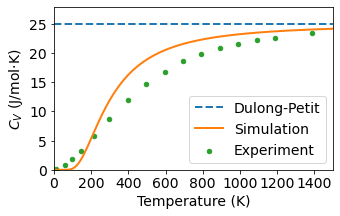

In [8]:
plt.figure(figsize=(5,3))
plt.axhline(y=triR, color='C0', linestyle='--', linewidth = 2, label = "Dulong-Petit")
plt.plot(tempe,cv,linewidth = 2, color="C1", label = "Simulation")
plt.scatter(exp_gpt[0],exp_gpt[1], label="Experiment", color="C2", s = 20)
plt.xlabel(r'Temperature (K)',fontsize=14)
plt.ylabel('$C_V$ (J/mol$\cdot$K)', fontsize=14)
plt.xlim(0,tempe[-1])
plt.ylim(0, triR+3)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 14, loc=4)